### 8. GAN
1. Обучите нейронную сеть любой архитектуры, которой не было на курсе, либо нейронную сеть разобранной архитектуры, но на том датасете, которого не было на уроках. Сделайте анализ того, что вам помогло в улучшения работы нейронной сети<br>
2. Сделайте краткий обзор научной работы, посвящённой алгоритму нейронных сетей, не рассматриваемому ранее на курсе. Проведите анализ: чем отличается выбранная архитектура от других? В чём плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при её применении на практике?<br>


### Глубокое обучение быстро возможно? Да, при помощи Fast AI

В цифровом мире повсеместно используются нейронные сети для выполнения самых разных задач. Считается, что начать работать с нейросетями довольно сложно, несмотря на наличие огромного количества информации в источниках, существование готовых фреймворков, например, tensorflow, pytorch и других. 
Предлагаю рассмотреть инструмент, позволяющий легко совершить «быстрый старт» и опробовать нейронные сети в деле самостоятельно – это Fast AI. 
Fast AI – это прежде всего группа исследователей, занимающихся вопросами искусственного интеллекта и глубокого обучения в частности, которая выпустила одноимённую библиотеку в свободное пользование в 2018 году. Если говорить простыми словами – fast ai представляет собой надстройку над упомянутым выше фреймворком pytorch и упрощает работу с ним, делает это быстрее. Отсюда и слово «быстро» в названии сетки.<br>ДлЯ наглядности попробуем обучить сеть на простом примере задачи классификации изображений и научим различать на портретном фото анфас людей по полу (мужчин (tensor(0) и женщин(tensor(1)). 

In [1]:
!pip install fastai

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import fastai
from fastai.vision.all import *

In [3]:
import numpy as np
import PIL.Image
from PIL import Image

Для испытаний я создала библиотеку картинок, состоящую из фотографий мужчин и женщин, скачанных из интерента в свободном доступе. Распределила их по 2 папакам, которые будут соответствовать двум классам: Men (tensor0) и Women (tensor1).

In [13]:
path = r"checkpoints"

Теперь необходимо написать функцию, которая позволит классификатору корректно разметить обучающую выборку изображений, но к этому мы вернёмся позже. Создаём объект класса DataBlock, являющийся контейнером, содержащим информацию о наших данных и о предобработке, которую нужно осуществить:

In [14]:
label_function = lambda f: str(f).split("\\")[-2]
mans = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                         get_items=get_image_files, 
                         splitter=RandomSplitter(),
                         get_y=label_function,
                         item_tfms=Resize(224, method=ResizeMethod.Pad))

Это список, содержащий пути ко всем изображениям обучающей выборки. Поскольку в качестве выходных значений мы хотим видеть наименование класса (man|woman), label_function должна возвращать название папки, в которой находится конкретное изображение:

In [15]:
files=get_image_files(path)

In [18]:
files

(#117) [Path('checkpoints/Man/man1.jpg'),Path('checkpoints/Man/man10.jpg'),Path('checkpoints/Man/man11.jpg'),Path('checkpoints/Man/man12.jpg'),Path('checkpoints/Man/man13.jpg'),Path('checkpoints/Man/man14.jpg'),Path('checkpoints/Man/man15.jpg'),Path('checkpoints/Man/man16.jpg'),Path('checkpoints/Man/man17.jpg'),Path('checkpoints/Man/man18.jpg')...]

Параметр item_tfms – обработка изображения. Здесь мы уменьшаем изображения до размера 224х224 (все изображения должны быть одного размера) и указываем метод, применяемый для изменения размера: ResizeMethod.<br>Чтобы обесцветить изображение, можно воспользоваться классом Saturation(), передав параметрам max_lighting, p и draw значения 0.0, 1.0 и 0.0 (по аналогии с Rotate()).<br>Кроме того, эта функция автоматически заполнит недостающее изображение заркальным отражением, т е кусочками самого изображения, чтобы подогнать размер, что совершенно не скажется на результатах обучения.


In [19]:
#В случае необходимости применения группы преобразований, следует воспользоваться функцией setup_aug_tfms:
batch_tfms = setup_aug_tfms([Resize(224, method=ResizeMethod.Pad), Rotate(max_deg=None, p=1, draw=None), Saturation(max_lighting=0.0, p=1.0, draw=0.0)])

In [20]:
#Вызываем метод dataloaders() и передаём путь к папке с изображениями:
loader = mans.dataloaders(path)    

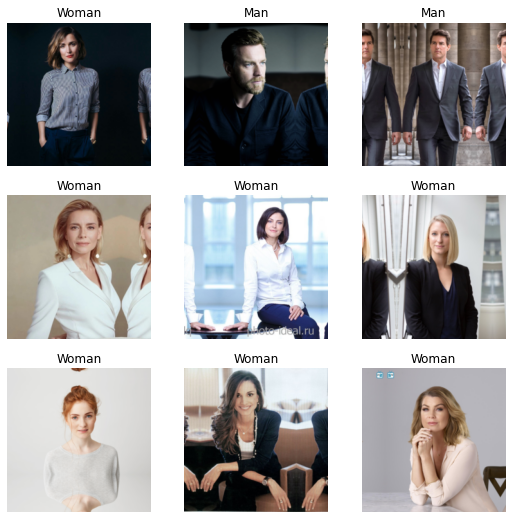

In [21]:
loader.show_batch(max_n=9)

Обработка данных отработала корректно. Осталось произвести обучение нейронной сети. Библиотека fast ai предоставляет возможность сконфигурировать свою нейронную сеть, но мы в данном примере воспользуемся предобученной свёрточной нейросетью resnet34, которая подходит для классификации изображений:

In [22]:
learn = cnn_learner(loader, resnet34, metrics=error_rate)

C:\Users\Инна\AppData\Roaming\Python\Python39\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\Инна\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Инна\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.

У cnn_learner довольно много параметров, выше мы передали значения самым основным – dls (объект data loaders), arch (архитектура нейронной сети), metrics (метрики).  Возможно, возникнет необходимость изменить параметр lr (learning rate), отвечающий за скорость обучения нейронной сети – чем выше значение lr, тем быстрее обучение, но снижается точность, и наоборот. Следует избегать слишком низких значений lr, поскольку помимо снижения скорости обучения это влечёт вероятность переобучения нейронной сети. Значение по умолчанию 0.001. Ещё один из параметров, которые мы рассмотрим – opt_func (оптимизатор), который используется для достижения лучших результатов обучения. По умолчанию, предлагается использовать оптимизатор Adam. В fast ai помимо Adam реализованы SGD, RMSProp, RAdam, QHAdam, LARS/LARC, LAMB.

In [23]:
#вызываем метод fine_tune для обучения нейронки под нашу задачу с оптимизатором Adam
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.320759,1.793001,0.521739,00:38


epoch,train_loss,valid_loss,error_rate,time
0,2.155073,1.256183,0.521739,00:45
1,1.765983,0.861666,0.434783,00:45
2,1.487029,0.597455,0.217391,00:43
3,1.271712,0.511486,0.217391,00:45
4,1.050965,0.436399,0.217391,00:45
5,0.892591,0.393907,0.217391,00:45
6,0.783484,0.347755,0.217391,00:45
7,0.683264,0.313790,0.217391,00:46
8,0.602972,0.307061,0.217391,00:46
9,0.540827,0.301430,0.173913,00:45


За 10 эпох мы достигли довольно неплохих результатов. Теперь можем взглянуть на результат

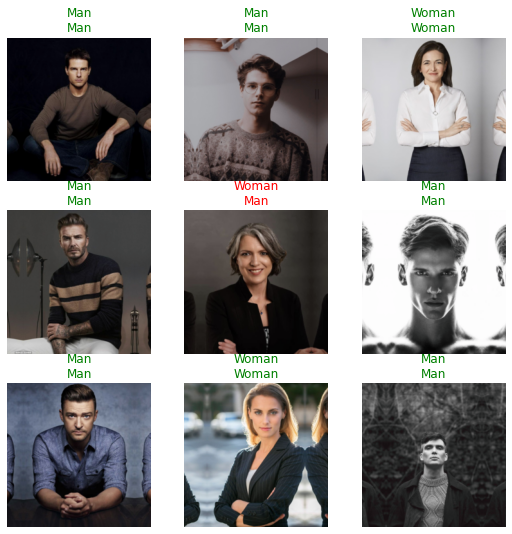

In [24]:
learn.show_results()

Теперь мы можем попробовать классифицировать изображение с человеком, которого не было в исходной выборке, вызвав метод predict и передав путь к изображению

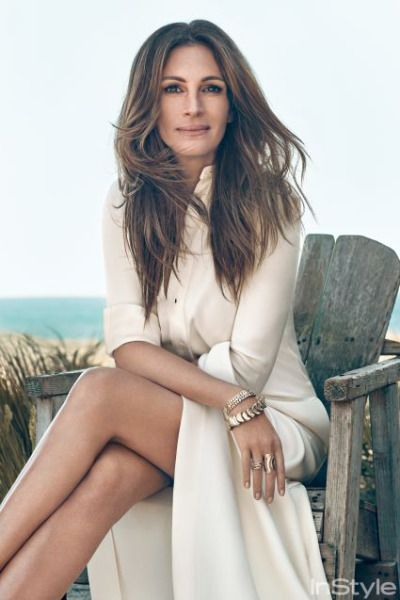

In [27]:
Image.open('test_picture.jpg')

In [25]:
learn.predict(item=r'test_picture.jpg')

('Woman', tensor(1), tensor([0.0287, 0.9713]))

Модель отработала верно. А как на счет мужчин?


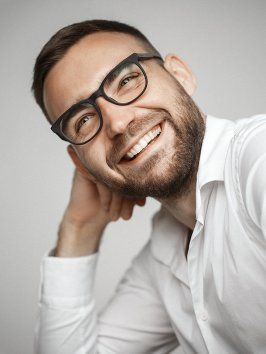

In [29]:
Image.open('test_picture(1).jpg')

In [31]:
learn.predict(item=r'test_picture(1).jpg')

('Man', tensor(0), tensor([0.6656, 0.3344]))

Модель классифицировала верно (хотя и сомневалась).

И всё это порядка 25 строк кода, включая проверки. Разумеется, для более нетривиальных задач программа усложнится в некоторой степени. И тем не менее, можно сделать вывод, что fast ai оправдывает своё название и является довольно гибким и простым для быстрого старта инструментом.